In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings(action='once')
import numpy as np
import data_functions as df
import text_functions as tf
import analitics_functions as af
import lda_functions as lf

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:369: DeprecationWarning: invalid escape sequence \[
  _match = re.compile("(datetime64|M8)\[(?P<unit>.+), (?P<tz>.+)\]")
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:399: DeprecationWarning: invalid escape sequence \w
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:677: DeprecationWarning: invalid escape sequence \d
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2679: DeprecationWarning: invalid escape sequence \*
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1001: DeprecationWarning: invalid escape sequence \m
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1062: DeprecationWarning: invalid escape seque

In [4]:
isDebug=True
mode='FAST'

In [5]:
#создаем массивы данных
questionsAnswers, questionsOriginal, answersOriginal, questionsNormalized=df.load_data(mode)
dictionary=df.create_dictionary(questionsNormalized,10,3000, mode)


loading data, please wait...
loading data DONE
<Загрузка из дампа>

Всего слов в словаре: 3307


In [6]:
#делаем матрицу слов и документов
#считаем разряженность
vectorizer = CountVectorizer(analyzer='word', vocabulary=dictionary)
dataVectorized = vectorizer.fit_transform(' '.join(t) for t in questionsNormalized[:])
matrixDoc2words=np.array(dataVectorized.todense())
af.check_sparsity(matrixDoc2words)

Sparsicity (матрица разряженности нулей и неНулей):  0.3007117421210558 %



поиск будет осуществляться заново, ждите долго ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20.

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score from all models checked:  -1105177.9250275753


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


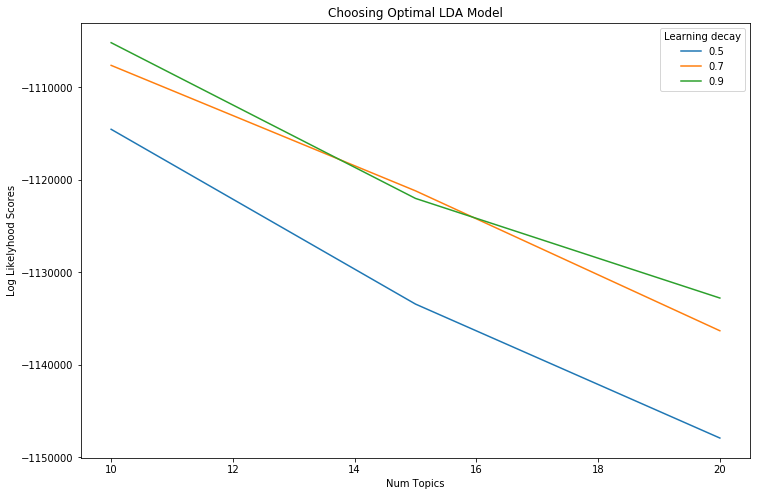

Log Likelihood (Higher is better):  -3222889.2152588954
Perplexity (Lower is better):  1371.8855657225633


In [19]:
#search and get best lda model
ldaModel, ldaOutput = lf.grid_search_best_lda (searchParams={'n_components': [10, 15, 20], 'learning_decay': [.5, .7, .9]}, calculatedModels=False, dataVectorized=dataVectorized)
af.check_likelihood(ldaModel, dataVectorized)
af.check_perplexity(ldaModel, dataVectorized)

In [8]:
#получим вектор столбец с темой по каждому документу
#ldaOutput = ldaModel.transform(dataVectorized)
question2themesVector=np.argmax(ldaOutput,axis=1)

#показать названия кластеров
#получим уникальные слова в темах модели и добавляем к ним наиболее часто встречающиеся из всех ненормированных слов
mostFreqWordsPerThemes=lf.get_most_freq_words_per_theme(vectorizer.get_feature_names(), ldaModel, questionsOriginal)
lf.show_most_freq_words_per_theme(mostFreqWordsPerThemes)

Все ключевые ненормированые слова в найденных темах:
Тема 0: наличных кабинет дебетовую visa выписку поменять срок сразу забрать выдали вообще обычно дизайном условия индивидуальным
Тема 1: сотрудники заявление вернуть ответ должны списание обращение написано магазине сегодня списание адрес денег будут возврат
Тема 2: вклад снять комиссия открыть перевести россии банкомат городе карточку сколько москве процент рублей закрыть счёт
Тема 3: мобильный приходит подключить услуги работает баланс долго сегодня отключить платеж ждать пополнить оператор пополнить молодежную
Тема 4: пришло заявку сайте говорят перевели обслуживание ситуация недели сбербанк поступили оформить привязать сняли прошло вчера
Тема 5: средств паспорт доброго могут документы денежных получается времени снять пенсию сберкнижки выдаче находится сберкнижки информацию
Тема 6: пароль операции пишет проблема интернет пользоваться раньше пытаюсь подтверждения ошибка проблема зайти входа списание логин
Тема 7: узнать срок обрат

In [9]:
#показать все ключевые нормированые слова исходя из модели по темам
if isDebug:
    lf.show_most_freq_words_per_theme_via_lda(ldaModel, vectorizer.get_feature_names())

Все ключевые нормированые слова в найденных темах:
Тема 0: ['личн' 'кабинет' 'дебетов' 'visa' 'выписк' 'поменя' 'срок' 'сраз' 'забра'
 'выда' 'вообщ' 'обычн' 'дизайн' 'слов' 'индивидуальн']
Тема 1: ['сотрудник' 'заявлен' 'вернут' 'ответ' 'должн' 'списа' 'обращен' 'написа'
 'магазин' 'сегодн' 'писа' 'адрес' 'денег' 'будут' 'возврат']
Тема 2: ['вклад' 'снят' 'комисс' 'откр' 'перевест' 'росс' 'банкомат' 'город'
 'карточк' 'скольк' 'москв' 'процент' 'рубл' 'закр' 'счёт']
Тема 3: ['мобильн' 'приход' 'подключ' 'услуг' 'работа' 'баланс' 'долг' 'сегодн'
 'отключ' 'платеж' 'ждат' 'пополн' 'оператор' 'полн' 'молодежн']
Тема 4: ['пришл' 'заявк' 'сайт' 'говор' 'перевел' 'обслуживан' 'ситуац' 'недел'
 'сбер' 'поступ' 'оформ' 'привяза' 'снял' 'прошл' 'вчер']
Тема 5: ['средств' 'паспорт' 'добр' 'могут' 'документ' 'денежн' 'получа' 'времен'
 'снят' 'пенс' 'сберкнижк' 'выдач' 'наход' 'книжк' 'информац']
Тема 6: ['парол' 'операц' 'пишет' 'проблем' 'интернет' 'пользова' 'раньш' 'пыта'
 'подтвержден' 'оши

ValueError: dimension mismatch

In [ ]:
#разное бесполезное

#получить 15 ключевых слов из каждой темы через короткие нормированные слова
lf.show_most_freq_words_per_theme_via_lda (ldaModel, vectorizer.get_feature_names())

#размеры кластеров
#for cluster_num in range(len(set(Q2themes))):
#    print ("Размер кластера {}: {}".format(cluster_num, np.array(np.where(Q2themes == cluster_num)).size))
    
#tf.show_top_freq_words(questions_norm, 24)
    
    
#распределение тем в документе:
print (ldaOutput[30400])
#распределение слов в теме:
print (ldaModel.components_[5])
#слова из словаря:
print (vectorizer.get_feature_names())